In [1]:
import pandas as pd

# loading dataset

In [2]:
df = pd.read_csv('basketball_stat.csv')

In [3]:
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [4]:
# how many players per position?
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

# data visualization: decide which feature is helping us, which are not

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'STL and 2P for each player')

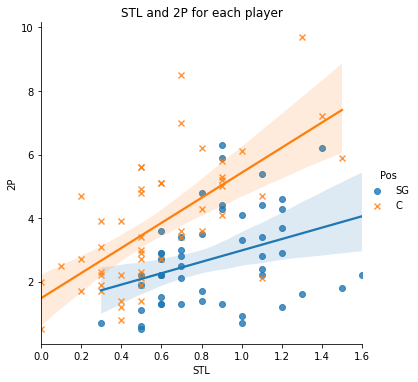

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# draw a line plot
sns.lmplot('STL', '2P', data = df, fit_reg = True,
    markers = ["o", "x"],
    hue = "Pos")
plt.title('STL and 2P for each player')
# x-axis, y-axis, data, not adding the line
# use different color

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


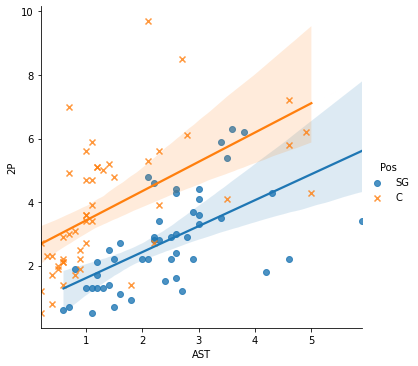

In [6]:
sns.lmplot('AST', '2P', data = df, fit_reg = True,
    markers = ["o", "x"],
    hue = "Pos")

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


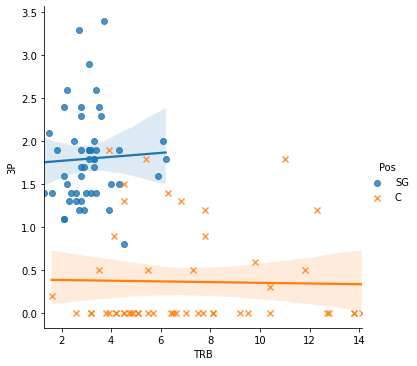

In [7]:
sns.lmplot('TRB', '3P', data = df, fit_reg = True,
    markers = ["o", "x"],
    hue = "Pos")

# data trimming

In [8]:
df.drop(['2P', 'AST', 'STL'], axis = 1, inplace = True)

In [9]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


# data split (train vs test) and find k

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)

In [11]:
# double check how many train data points?
train.shape[0]

80

In [12]:
# double check how many test data points?
test.shape[0]

20

# store trimmed data in a file

In [13]:
import pickle
with open('basketball_train.pkl', 'wb') as train_data:
    pickle.dump(train, train_data)

with open('basketball_test.pkl', 'wb') as test_data:
    pickle.dump(test, test_data)

In [14]:
train

,Player,Pos,3P,TRB,BLK
29,Channing Frye,C,1.9,3.9,0.5
8,Patrick Beverley,SG,1.6,5.9,0.4
93,Jonas Valanciunas,C,0.0,9.5,0.8
91,Karl-Anthony Towns,C,1.2,12.3,1.3
40,Montrezl Harrell,C,0.0,3.8,0.7
...,...,...,...,...,...
63,Ian Mahinmi,C,0.0,4.8,0.8
47,Justin Holiday,SG,1.2,2.7,0.4
4,Will Barton,SG,1.5,4.3,0.5
96,Dwyane Wade,SG,0.8,4.5,0.7


In [15]:
test

,Player,Pos,3P,TRB,BLK
69,Salah Mejri,C,0.0,4.2,0.8
62,Robin Lopez,C,0.0,6.4,1.4
24,Dewayne Dedmon,C,0.0,6.5,0.8
25,Andre Drummond,C,0.0,13.8,1.1
12,Devin Booker,SG,1.9,3.2,0.3
43,John Henson,C,0.0,5.1,1.3
31,Pau Gasol,C,0.9,7.8,1.1
3,Chris Andersen,C,0.0,2.6,0.6
67,Ben McLemore,SG,1.1,2.1,0.1
85,Marreese Speights,C,1.3,4.5,0.5
